In [ ]:
music_data=read.csv('/content/music_genre.csv',na.strings=c("NA", "NULL"))

In [ ]:
head(music_data)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
1,32894,Röyksopp,Röyksopp's Night Out,27,0.00468,0.652,-1,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
2,46652,Thievery Corporation,The Shining Path,31,0.01270,0.622,218293,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
3,30097,Dillon Francis,Hurricane,28,0.00306,0.620,215613,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
4,62177,Dubloadz,Nitro,34,0.02540,0.774,166875,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
5,24907,What So Not,Divide & Conquer,32,0.00465,0.638,222369,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
6,89064,Axel Boman,Hello,47,0.00523,0.755,519468,0.731,0.85400,D,0.216,-10.517,Minor,0.0412,?,4-Apr,0.614,Electronic


In [ ]:
music_data=na.omit(music_data)

In [ ]:
music_data.pca=prcomp(music_data[,c(1:23)], center = TRUE,scale. = TRUE)
summary(music_data.pca)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     1.9058 1.47283 1.13843 1.07071 1.06279 1.05734 1.05165
Proportion of Variance 0.1579 0.09431 0.05635 0.04984 0.04911 0.04861 0.04809
Cumulative Proportion  0.1579 0.25223 0.30858 0.35843 0.40754 0.45614 0.50423
                           PC8     PC9   PC10    PC11    PC12    PC13    PC14
Standard deviation     1.04564 1.04179 1.0375 1.03370 1.02785 1.01515 0.99545
Proportion of Variance 0.04754 0.04719 0.0468 0.04646 0.04593 0.04481 0.04308
Cumulative Proportion  0.55177 0.59895 0.6458 0.69222 0.73815 0.78296 0.82604
                          PC15    PC16    PC17    PC18   PC19    PC20    PC21
Standard deviation     0.97391 0.94901 0.84462 0.77613 0.6850 0.50620 0.33274
Proportion of Variance 0.04124 0.03916 0.03102 0.02619 0.0204 0.01114 0.00481
Cumulative Proportion  0.86728 0.90644 0.93745 0.96364 0.9840 0.99519 1.00000
                            PC22      

In [ ]:
music_data=music_data[-c(1,2,3,16)]

In [ ]:
dim(music_data)

[1] 50000    14

In [ ]:
install.packages("ggplot2")
library(ggplot2)
install.packages("dplyr")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
music_data=select(music_data,-c(12))

In [ ]:
install.packages('mltools')
library(mltools)
library(data.table)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [ ]:
#music_data$key=as.factor(music_data$key)
music_data=one_hot(as.data.table(music_data))

In [ ]:
music_data$mode <- as.factor(music_data$mode)
music_data <- one_hot(as.data.table(music_data))

In [ ]:
dim(music_data)

[1] 50000    14

In [ ]:
names(music_data)

[1] "popularity"       "acousticness"     "danceability"     "duration_ms"     
 [5] "energy"           "instrumentalness" "key"              "liveness"        
 [9] "loudness"         "mode_Major"       "mode_Minor"       "speechiness"     
[13] "valence"          "music_genre"

In [ ]:
music_data=select(music_data,-c(4,7))

In [ ]:
music_data=na.omit(music_data)

In [ ]:
install.packages("ggcorrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘reshape2’




In [ ]:
names(music_data)

[1] "popularity"       "acousticness"     "danceability"     "energy"          
 [5] "instrumentalness" "liveness"         "loudness"         "mode_Major"      
 [9] "mode_Minor"       "speechiness"      "valence"          "music_genre"

In [ ]:
numeric_cols=select_if(music_data, is.numeric)
categorical_cols=select_if(music_data, is.character)

In [ ]:
names(numeric_cols)
names(categorical_cols)

[1] "popularity"       "acousticness"     "danceability"     "energy"          
 [5] "instrumentalness" "liveness"         "loudness"         "mode_Major"      
 [9] "mode_Minor"       "speechiness"      "valence"

[1] "music_genre"

In [ ]:
install.packages('corrplot')
library(corrplot)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



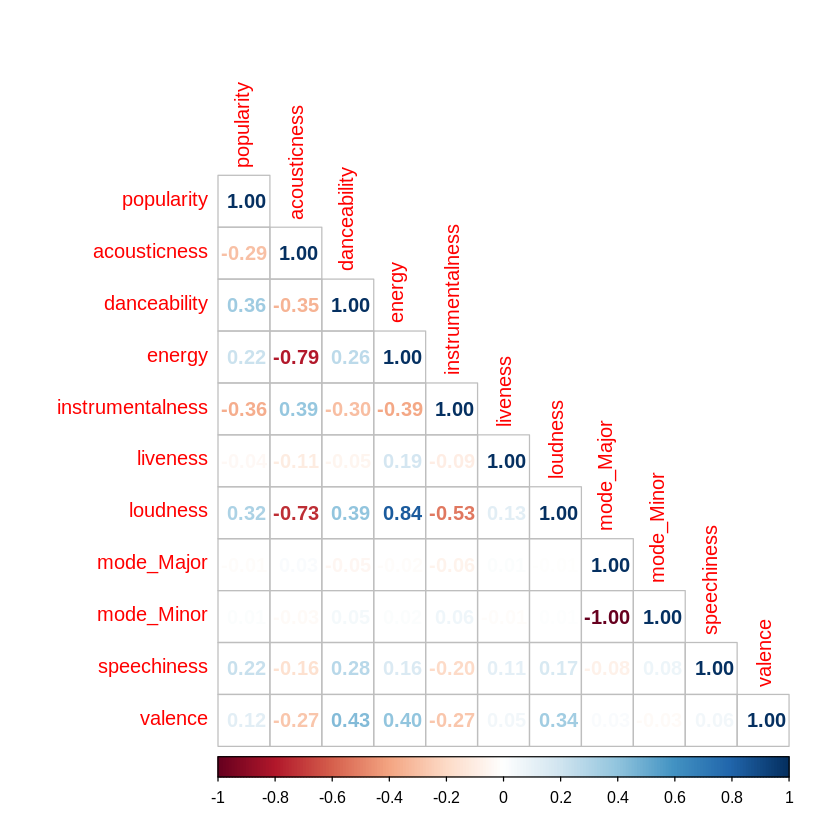

In [ ]:
M = cor(numeric_cols)
corrplot(M, method = 'number',type = "lower")

In [ ]:
install.packages("ggcorrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ggcorrplot)
cor_data=cor(numeric_cols)
ggcorrplot(cor_data,hc.order = TRUE,
           type = "lower",
           outline.color = "white")

In [ ]:
install.packages('caret')
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [ ]:
set.seed(5596)
idx=sample(1:nrow(music_data),0.8*nrow(music_data))
train_set=music_data[idx,]
test_set=music_data[-idx,]


In [ ]:

dim(train_set)
dim(test_set)

[1] 40000    12

[1] 10000    12

**DECISION TREE CLASSIFIER**

In [ ]:
install.packages("rpart")
install.packages("rpart.plot")
library("rpart")
library("rpart.plot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



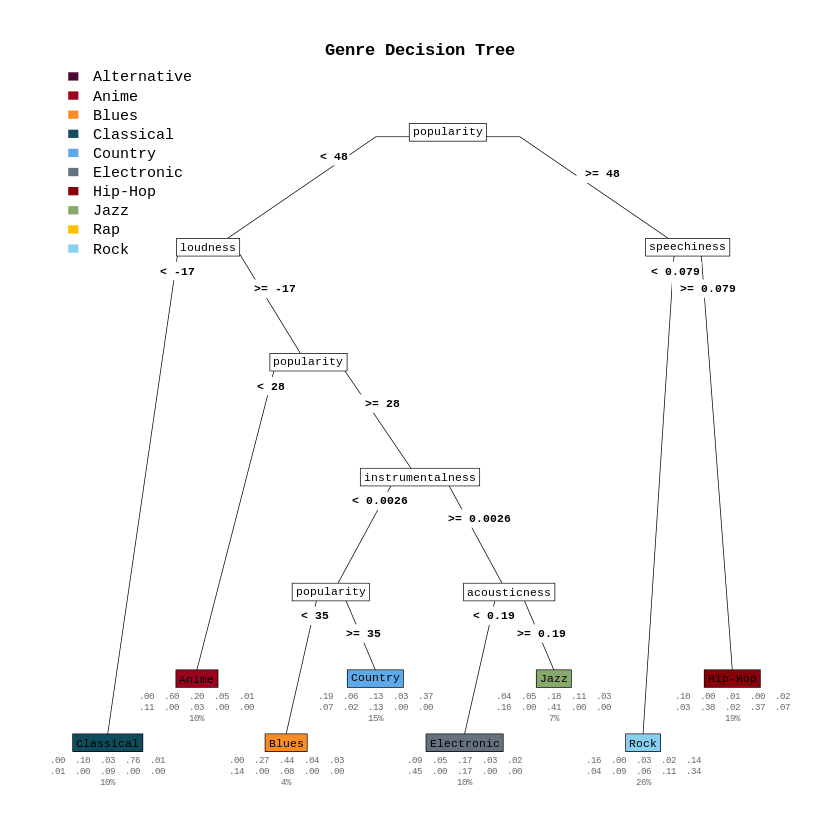

In [ ]:
model_dt=rpart(music_genre~., data = train_set)
rpart.plot(model_dt, 
           type = 5, 
           extra = 104,
           box.palette = list(purple = "#490B32",
               red = "#9A031E",
               orange = '#FB8B24',
               dark_blue = "#0F4C5C",
               blue = "#5DA9E9",
               grey = '#66717E',
               brown="#880009",
               green="#87A96B",
               yellow="#FFBF00",
               light_blue="#89CFF0"),
           leaf.round = 0,
           fallen.leaves = TRUE, 
           branch = 0.3, 
           under = TRUE,
           under.col = 'grey40',
           family = 'Avenir',
           main = 'Genre Decision Tree',
           tweak = 1.2)

In [ ]:
predictions = predict(model_dt, train_set,type ="class")
dt_train_table=confusionMatrix(table(as.factor(train_set$music_genre),predictions))
print(dt_train_table)

Confusion Matrix and Statistics

             predictions
              Alternative Anime Blues Classical Country Electronic Hip-Hop Jazz
  Alternative           0    16     2         8    1110        361     766  112
  Anime                 0  2354   472       396     373        181      30  149
  Blues                 0   780   778       117     759        667      53  518
  Classical             0   189    70      2900     151        132       9  322
  Country               0    34    52        22    2164         89     122   97
  Electronic            0   437   256        45     391       1769     211  459
  Hip-Hop               0     4     1         1     129         12    2910    0
  Jazz                  0   107   143       334     740        682     184 1162
  Rap                   0     6     0         0      27          1    2836    2
  Rock                  0     7     4         1      20          9     523    1
             predictions
               Rap Rock
  Alternative

In [ ]:
# Decision Tree Performance Parameters
require(pROC)
# Training Data
dt_train_pm=dt_train_table$byClass[, c("Balanced Accuracy", "Precision", "Sensitivity", "Specificity", "Recall")]
print("Naive Bayes Training data Performance Parameters:")
dt_train_pm
dt_train_macavg=round(apply(dt_train_pm,2,mean),4)
print("Macro Averages:")
dt_train_macavg

[1] "Naive Bayes Training data Performance Parameters:"


,Balanced Accuracy,Precision,Sensitivity,Specificity,Recall
Class: Alternative,NA,0.0000000,NA,0.8993250,NA
Class: Anime,0.7762841,0.5876186,0.5983732,0.9541951,0.5983732
Class: Blues,0.6764797,0.1939182,0.4375703,0.9153890,0.4375703
Class: Classical,0.8640221,0.7255442,0.7583682,0.9696760,0.7583682
Class: Country,0.6573889,0.5388446,0.3690314,0.9457464,0.3690314
Class: Electronic,0.6956207,0.4414774,0.4532411,0.9380004,0.4532411
Class: Hip-Hop,0.6744596,0.7389538,0.3806907,0.9682285,0.3806907
Class: Jazz,0.6676877,0.2903548,0.4117647,0.9236107,0.4117647
Class: Rap,NA,0.0000000,NA,0.9000000,NA
Class: Rock,0.6581381,0.8585732,0.3352556,0.9810205,0.3352556


[1] "Macro Averages:"


Balanced Accuracy         Precision       Sensitivity       Specificity 
               NA            0.4375                NA            0.9395 
           Recall 
               NA

In [ ]:
# finding AUC
dt_train_=predict(model_dt, train_set)
dt_train_AUC=multiclass.roc(train_set$music_genre,dt_train_)
print(paste("Decision Tree Training AUC:",round(dt_train_AUC$auc,4)))
dt_train_ROC=dt_train_AUC$rocs

[1] "Decision Tree Training AUC: 0.8301"


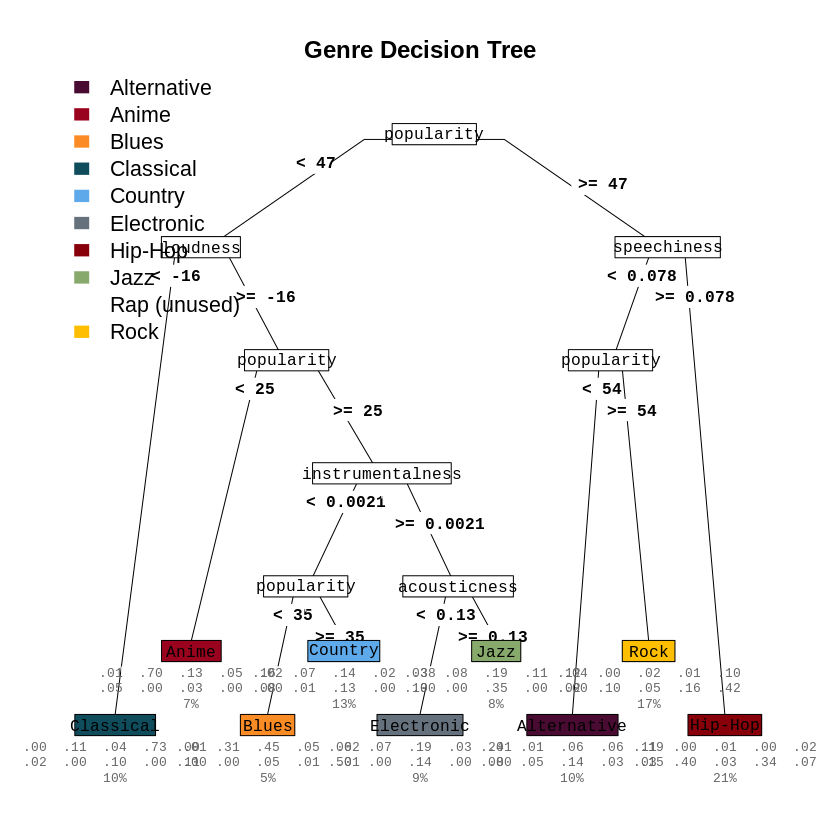

In [ ]:
model_dtt=rpart(music_genre~., data = test_set)
rpart.plot(model_dtt, 
           type = 5, 
           extra = 104,
           box.palette = list(purple = "#490B32",
               red = "#9A031E",
               orange = '#FB8B24',
               dark_blue = "#0F4C5C",
               blue = "#5DA9E9",
               grey = '#66717E',
               brown="#880009",
               green="#87A96B",
               yellow="#FFBF00",
               light_blue="#89CFF0"),
           leaf.round = 0,
           fallen.leaves = TRUE, 
           branch = 0.3, 
           under = TRUE,
           under.col = 'grey40',
           family = 'Avenir',
           main = 'Genre Decision Tree',
           tweak = 1.2)

In [ ]:
predictions_test = predict(model_dtt, test_set,type ="class")
dt_test_table=confusionMatrix(table(as.factor(test_set$music_genre),predictions_test))
print(dt_test_table)

Confusion Matrix and Statistics

             predictions_test
              Alternative Anime Blues Classical Country Electronic Hip-Hop Jazz
  Alternative         249     4     1         0     215         56     220   27
  Anime                 7   495   156       108      93         60       5   64
  Blues                59    95   230        37     184        171      21  154
  Classical            57    36    24       728      32         27       4   86
  Country             199    17    12         6     502         12      36   29
  Electronic           84    38    55        17     102        456      57  150
  Hip-Hop              50     2     0         0      15          0     823    1
  Jazz                139    21    26       105     170        125      52  280
  Rap                  35     1     4         0       2          0     695    0
  Rock                150     3     3         0       1          1     152    0
             predictions_test
              Rap Rock
  Al

In [ ]:
# Decision Tree Performance Parameters
require(pROC)
# Testing Data
dt_test_pm=dt_test_table$byClass[, c("Balanced Accuracy", "Precision", "Sensitivity", "Specificity", "Recall")]
print("Naive Bayes Training data Performance Parameters:")
dt_test_pm
dt_test_macavg=round(apply(dt_test_pm,2,mean),4)
print("Macro Averages:")
dt_test_macavg

[1] "Naive Bayes Training data Performance Parameters:"


,Balanced Accuracy,Precision,Sensitivity,Specificity,Recall
Class: Alternative,0.5806390,0.2559096,0.2419825,0.9192955,0.2419825
Class: Anime,0.8207497,0.4979879,0.6952247,0.9462748,0.6952247
Class: Blues,0.6851079,0.2327935,0.4500978,0.9201180,0.4500978
Class: Classical,0.8483569,0.7258225,0.7272727,0.9694410,0.7272727
Class: Country,0.6629773,0.5101626,0.3814590,0.9444956,0.3814590
Class: Electronic,0.7215699,0.4592145,0.5022026,0.9409371,0.5022026
Class: Hip-Hop,0.6842137,0.7749529,0.3985472,0.9698803,0.3985472
Class: Jazz,0.6380075,0.2805611,0.3539823,0.9220328,0.3539823
Class: Rap,NA,0.0000000,NA,0.9000000,NA
Class: Rock,0.6898576,0.6915423,0.4169166,0.9627985,0.4169166


[1] "Macro Averages:"


Balanced Accuracy         Precision       Sensitivity       Specificity 
               NA            0.4429                NA            0.9395 
           Recall 
               NA

In [ ]:
# finding AUC
dt_test_=predict(model_dt, test_set, type="prob")
dt_test_AUC=multiclass.roc(test_set$music_genre,dt_test_)
print(paste("Decision Tree Training AUC:",round(dt_test_AUC$auc,4)))
dt_test_ROC=dt_test_AUC$rocs

[1] "Decision Tree Training AUC: 0.8256"


In [ ]:
#Plotting ROC
dt_test_ROC=dt_test_AUC$rocs
plot.roc(dt_test_ROC[[1]],col=1,main="ROC curves of 10 One vs one class")
for(i in 2:11)
{num=paste("1/",as.character(i),sep="")
lines.roc(dt_test_ROC[[i]],col=i)
}

ERROR: ignored

**SVM**

In [ ]:
library(e1071)

In [ ]:

song_svm=svm(as.factor(music_genre)~., data = train_set, cost = 1)

In [ ]:
pred_train_svm = predict(song_svm)
table_svm_train=table(train_set$music_genre, pred_train_svm)
svm_train_stat=caret::confusionMatrix(table_svm_train)
print(svm_train_stat)


Confusion Matrix and Statistics

             pred_train_svm
              Alternative Anime Blues Classical Country Electronic Hip-Hop Jazz
  Alternative        1571    24    58         6     626        188     421  208
  Anime               144  2798   289       329     162        192       1   67
  Blues               176   382  2176        55     417        206      11  396
  Classical           103   119    83      3400      22         96       0  161
  Country             274    70   273         4    2210        115      81  200
  Electronic          281   208   234        25     167       2443     129  368
  Hip-Hop             144     0     6         0      38         36    2146   26
  Jazz                150    76   439       273     275        528     108 1980
  Rap                 148     0     2         0      43         16    1546   26
  Rock                349     9    11         9     252         31     111   97
             pred_train_svm
               Rap Rock
  Alter

In [ ]:
# SVM train Performance Parameters
require(pROC)
# Training Data
svm_train_pm=svm_train_stat$byClass[, c("Balanced Accuracy", "Precision", "Sensitivity", "Specificity", "Recall")]
print("Support Vector Machine Training Data Performance Parameters:")
svm_train_pm
svm_train_macavg=round(apply(svm_train_pm,2,mean),4)
print("Macro Averages:")
svm_train_macavg


[1] "Support Vector Machine Training Data Performance Parameters:"


,Balanced Accuracy,Precision,Sensitivity,Specificity,Recall
Class: Alternative,0.7016826,0.3901167,0.4703593,0.9330060,0.4703593
Class: Anime,0.8629115,0.6984523,0.7590884,0.9667346,0.7590884
Class: Blues,0.7794769,0.5423729,0.6093531,0.9496006,0.6093531
Class: Classical,0.9062180,0.8506380,0.8290661,0.9833700,0.8290661
Class: Country,0.7371138,0.5502988,0.5246914,0.9495362,0.5246914
Class: Electronic,0.7955577,0.6096831,0.6343807,0.9567346,0.6343807
Class: Hip-Hop,0.7103392,0.5449467,0.4712341,0.9494442,0.4712341
Class: Jazz,0.7528121,0.4947526,0.5610655,0.9445587,0.5610655
Class: Rap,0.7175525,0.4207500,0.4983713,0.9367337,0.4983713
Class: Rock,0.7403706,0.7394243,0.5111611,0.9695801,0.5111611


[1] "Macro Averages:"


Balanced Accuracy         Precision       Sensitivity       Specificity 
           0.7704            0.5841            0.5869            0.9539 
           Recall 
           0.5869

In [ ]:
# finding AUC
svm_train_=predict(song_svm, train_set, type="prob")
svm_train_AUC=multiclass.roc(train_set$music_genre,as.numeric(svm_train_))
print(paste("Support Vector Machine Training AUC:",round(svm_train_AUC$auc,4)))
svm_train_ROC=svm_train_AUC$rocs

Setting direction: controls > cases

Setting direction: controls > cases

Setting direction: controls > cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

S

[1] "Support Vector Machine Training AUC: 0.755"


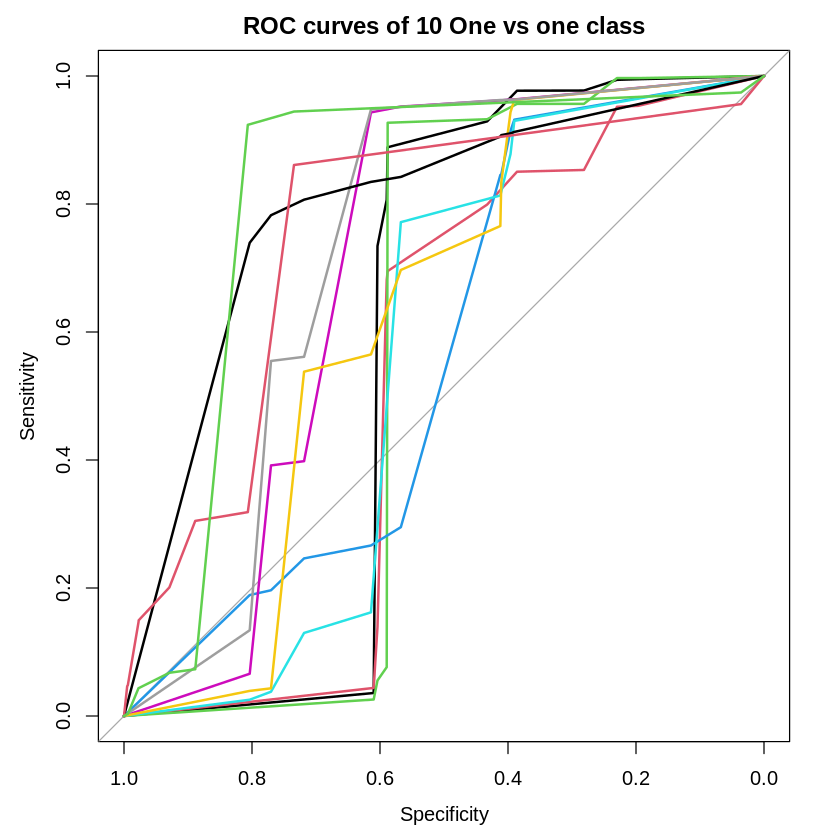

In [ ]:
#Plotting ROC
svm_train_ROC=svm_train_AUC$rocs
plot.roc(svm_train_ROC[[1]],col=1,main="ROC curves of 10 One vs one class")
for(i in 2:11)
{num=paste("1/",as.character(i),sep="")
lines.roc(svm_train_ROC[[i]],col=i)
}

In [ ]:
#Bias and variance
print(var(as.numeric(svm_train_), as.numeric(as.factor(train_set$music_genre))))
bias(as.numeric(svm_train_), as.numeric(as.factor(train_set$music_genre)))

[1] 4.653399


[1] 0.264275

In [ ]:
pred_test_svm =predict(song_svm, test_set)
table_svm_test=table(test_set$music_genre, pred_test_svm)
svm_test_stat=caret::confusionMatrix(table_svm_test)
print(svm_test_stat)

Confusion Matrix and Statistics

             pred_test_svm
              Alternative Anime Blues Classical Country Electronic Hip-Hop Jazz
  Alternative         356     8    18         1     145         41     108   58
  Anime                24   684    66        88      49         55       1   19
  Blues                58    88   504        16      94         56       4  121
  Classical            31    35    28       831       4         16       0   55
  Country              73    28    65         1     518         29      34   53
  Electronic           71    50    48        11      40        588      32  108
  Hip-Hop              44     0     1         0      10         11     525   15
  Jazz                 43    22   113        74      68        128      36  474
  Rap                  35     0     2         0       9         10     406    8
  Rock                 88     4     2         1      61          9      25   21
             pred_test_svm
              Rap Rock
  Alternat

In [ ]:
# SVM test Performance Parameters
require(pROC)
# Testing Data
svm_test_pm=svm_test_stat$byClass[, c("Balanced Accuracy", "Precision", "Sensitivity", "Specificity", "Recall")]
print("Support Vector Machine Testing Data Performance Parameters:")
svm_test_pm
svm_test_macavg=round(apply(svm_test_pm,2,mean),4)
print("Macro Averages:")
svm_test_macavg

[1] "Support Vector Machine Testing Data Performance Parameters:"


,Balanced Accuracy,Precision,Sensitivity,Specificity,Recall
Class: Alternative,0.6826652,0.3658787,0.4325638,0.9327667,0.4325638
Class: Anime,0.8550750,0.6881288,0.7442873,0.9658628,0.7442873
Class: Blues,0.7710812,0.5101215,0.5950413,0.9471212,0.5950413
Class: Classical,0.8965783,0.8285145,0.8123167,0.9808399,0.8123167
Class: Country,0.7336359,0.5264228,0.5190381,0.9482337,0.5190381
Class: Electronic,0.7894125,0.5921450,0.6235419,0.9552832,0.6235419
Class: Hip-Hop,0.6937562,0.4943503,0.4483348,0.9391777,0.4483348
Class: Jazz,0.7253990,0.4749499,0.5085837,0.9422144,0.5085837
Class: Rap,0.6856380,0.3880000,0.4384181,0.9328579,0.4384181
Class: Rock,0.7420974,0.7462687,0.5140507,0.9701440,0.5140507


[1] "Macro Averages:"


Balanced Accuracy         Precision       Sensitivity       Specificity 
           0.7575            0.5615            0.5636            0.9515 
           Recall 
           0.5636

In [ ]:
# finding AUC
svm_test_=predict(song_svm, test_set, type="prob")
svm_test_AUC=multiclass.roc(test_set$music_genre,as.numeric(svm_test_))
print(paste("Support Vector Machine Testing AUC:",round(svm_test_AUC$auc,4)))
svm_test_ROC=svm_test_AUC$rocs

Setting direction: controls > cases

Setting direction: controls > cases

Setting direction: controls > cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

S

[1] "Support Vector Machine Testing AUC: 0.7456"


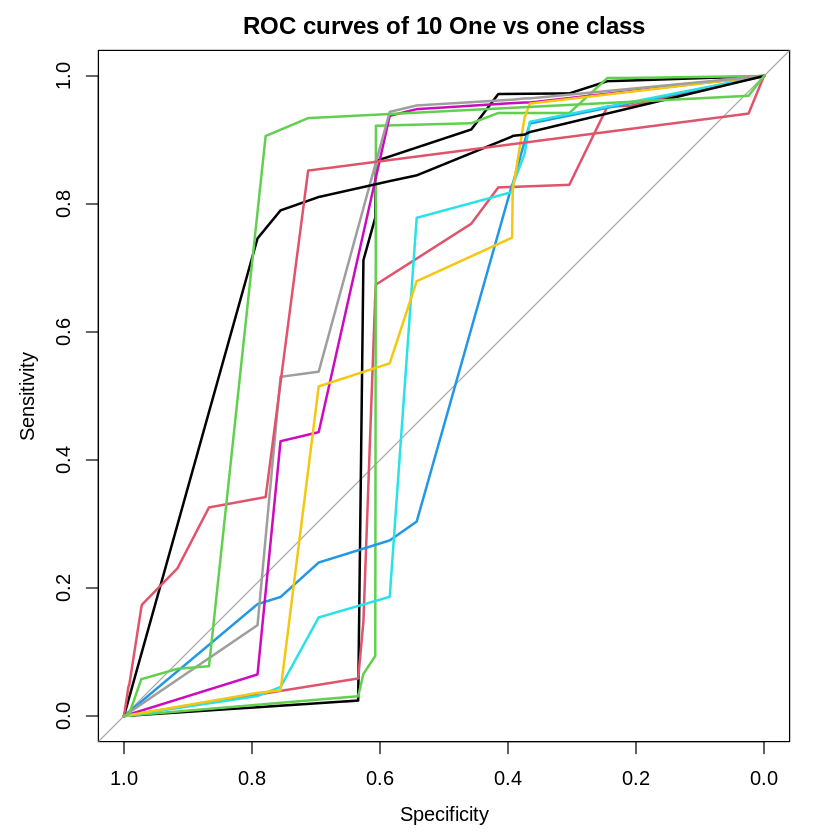

In [ ]:
#Plotting ROC
svm_test_ROC=svm_test_AUC$rocs
plot.roc(svm_test_ROC[[1]],col=1,main="ROC curves of 10 One vs one class")
for(i in 2:11)
{num=paste("1/",as.character(i),sep="")
lines.roc(svm_test_ROC[[i]],col=i)
}

In [ ]:
#Bias and variance
print(var(as.numeric(svm_test_), as.numeric(as.factor(test_set$music_genre))))
bias(as.numeric(svm_test_), as.numeric(as.factor(test_set$music_genre)))

[1] 4.495685


[1] 0.2867

**KNN**

In [ ]:
#building model
require(class)
knn_op=knn(train_set[,-12],test_set[,-12],train_set$music_genre,k=15,prob = TRUE)

Loading required package: class



In [ ]:
knn_table=confusionMatrix(table(test_set$music_genre,knn_op))
print(knn_table)

Confusion Matrix and Statistics

             knn_op
              Alternative Anime Blues Classical Country Electronic Hip-Hop Jazz
  Alternative         335     5    14         1     164         24     102   45
  Anime                28   664    84        71      43         72       2   24
  Blues                51   122   390        40     151         76      10  101
  Classical            23    48    36       763      22         18       1   83
  Country             146    14    49         6     435         21      32   89
  Electronic          139   118   128        17     103        258      18  151
  Hip-Hop             103     1     5         0      41          1     289   26
  Jazz                 79    13   102       109     147        102      34  346
  Rap                  47     1     4         0      24          0     327    5
  Rock                 92     2     2         3      63          2      97   15
             knn_op
              Rap Rock
  Alternative  92  191
 

In [ ]:
# KNN test Performance Parameters
require(pROC)
# Testing Data
knn_test_pm=knn_table$byClass[, c("Balanced Accuracy", "Precision", "Sensitivity", "Specificity", "Recall")]
print("KNN Testing Data Performance Parameters:")
knn_test_pm
knn_test_macavg=round(apply(knn_test_pm,2,mean),4)
print("Macro Averages:")
knn_test_macavg

[1] "KNN Testing Data Performance Parameters:"


,Balanced Accuracy,Precision,Sensitivity,Specificity,Recall
Class: Alternative,0.6249798,0.3442960,0.3211889,0.9287708,0.3211889
Class: Anime,0.8177235,0.6680080,0.6720648,0.9633822,0.6720648
Class: Blues,0.7070082,0.3947368,0.4791155,0.9349009,0.4791155
Class: Classical,0.8643746,0.7607178,0.7554455,0.9733037,0.7554455
Class: Country,0.6511451,0.4420732,0.3646270,0.9376632,0.3646270
Class: Electronic,0.6857508,0.2598187,0.4494774,0.9220242,0.4494774
Class: Hip-Hop,0.6159144,0.2721281,0.3168860,0.9149428,0.3168860
Class: Jazz,0.6597150,0.3466934,0.3909605,0.9284696,0.3909605
Class: Rap,0.6224292,0.3820000,0.3151815,0.9296768,0.3151815
Class: Rock,0.6639391,0.5223881,0.3834916,0.9443865,0.3834916


[1] "Macro Averages:"


Balanced Accuracy         Precision       Sensitivity       Specificity 
           0.6913            0.4393            0.4448            0.9378 
           Recall 
           0.4448

In [ ]:
# finding AUC
#knn_test_=predict(knn_op,type="prob")
knn_test_AUC=multiclass.roc(test_set$music_genre,as.numeric(knn_op))
print(paste("KNN Testing AUC:",round(knn_test_AUC$auc,4)))
knn_test_ROC=knn_test_AUC$rocs

Setting direction: controls > cases

Setting direction: controls > cases

Setting direction: controls > cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

S

[1] "KNN Testing AUC: 0.7137"


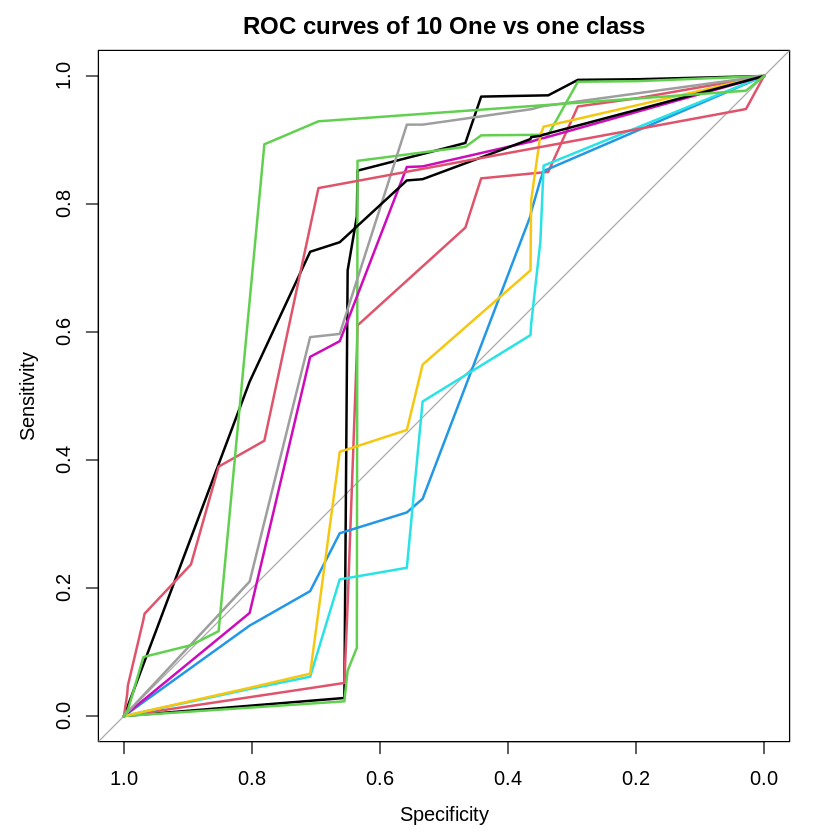

In [ ]:
#Plotting ROC
knn_test_ROC=knn_test_AUC$rocs
plot.roc(knn_test_ROC[[1]],col=1,main="ROC curves of 10 One vs one class")
for(i in 2:11)
{num=paste("1/",as.character(i),sep="")
lines.roc(knn_test_ROC[[i]],col=i)
}

In [ ]:
#Bias and variance
print(var(as.numeric(knn_op), as.numeric(as.factor(test_set$music_genre))))
bias(as.numeric(knn_op), as.numeric(as.factor(test_set$music_genre)))

[1] 4.057175


[1] 0.1689

**LOGSITIC REGRESSION**

In [ ]:
require(nnet)
library(tidyverse)
formstr="music_genre~."
lr_model=multinom(formstr,train_set,maxit=1000) # Train the model
lr_pred_train=predict(lr_model,train_set,type="class")
lr_train_table=confusionMatrix(table(train_set$music_genre, lr_pred_train))

Loading required package: nnet

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.8     ✔ purrr   0.3.5
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.3     ✔ forcats 0.5.2

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ data.table::between() masks dplyr::between()
✖ dplyr::filter()       masks stats::filter()
✖ data.table::first()   masks dplyr::first()
✖ dplyr::lag()          masks stats::lag()
✖ data.table::last()    masks dplyr::last()
✖ purrr::lift()         masks caret::lift()
✖ tidyr::replace_na()   masks mltools::replace_na()
✖ purrr::transpose()    masks data.table::transpose()



# weights:  130 (108 variable)
initial  value 92103.403720 
iter  10 value 81663.220347
iter  20 value 70612.897729
iter  30 value 61321.609198
iter  40 value 58767.788933
iter  50 value 54131.223827
iter  60 value 52632.777058
iter  70 value 51765.359956
iter  80 value 51264.403383
iter  90 value 51042.334484
iter 100 value 50980.300064
iter 110 value 50959.753593
iter 120 value 50952.503883
iter 130 value 50952.062727
iter 130 value 50952.062571
iter 130 value 50952.062567
final  value 50952.062567 
converged


In [ ]:
lr_train_table

Confusion Matrix and Statistics

             lr_pred_train
              Alternative Anime Blues Classical Country Electronic Hip-Hop Jazz
  Alternative        1280    21   100        12     933        286     317  243
  Anime               102  2454   401       484     220        220       0  109
  Blues               139   727  1846        74     442        198       4  411
  Classical            73   249   104      3206      41         98       0  207
  Country             232    53   458        11    2283        154      55  120
  Electronic          263   329   245        45     188       2323     112  336
  Hip-Hop             301     0     8         1     134         49    1860   33
  Jazz                 92   189   558       281     418        630     107 1562
  Rap                 308     2     0         0     120         18    1507   39
  Rock                447     7    12         8     524         30      71   88
             lr_pred_train
               Rap Rock
  Alterna

In [ ]:
# Logistic Regression Performance Parameters
require(pROC)
# Training Data
lr_train_pm=lr_train_table$byClass[, c("Balanced Accuracy", "Precision", "Sensitivity", "Specificity", "Recall")]
print("Logistic-Regression Training data Performance Parameters:")
lr_train_pm
lr_train_macavg=round(apply(lr_train_pm,2,mean),4)
print("Macro Averages:")
lr_train_macavg


Loading required package: pROC

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




[1] "Logistic-Regression Training data Performance Parameters:"


,Balanced Accuracy,Precision,Sensitivity,Specificity,Recall
Class: Alternative,0.6603530,0.3178545,0.3954279,0.9252781,0.3954279
Class: Anime,0.7828168,0.6125811,0.6087819,0.9568517,0.6087819
Class: Blues,0.7174594,0.4601196,0.4946409,0.9402779,0.4946409
Class: Classical,0.8778654,0.8021016,0.7777778,0.9779531,0.7777778
Class: Country,0.6902822,0.5684761,0.4305110,0.9500533,0.4305110
Class: Electronic,0.7665473,0.5797355,0.5798802,0.9532144,0.5798802
Class: Hip-Hop,0.7017100,0.4723210,0.4611951,0.9422248,0.4611951
Class: Jazz,0.7149886,0.3903048,0.4961881,0.9337892,0.4961881
Class: Rap,0.6967685,0.3915000,0.4600470,0.9334900,0.4600470
Class: Rock,0.7386232,0.6458073,0.5176565,0.9595899,0.5176565


[1] "Macro Averages:"


Balanced Accuracy         Precision       Sensitivity       Specificity 
           0.7347            0.5241            0.5222            0.9473 
           Recall 
           0.5222

In [ ]:
# finding AUC
lr_train_=predict(lr_model, train_set)
lr_train_AUC=multiclass.roc(train_set$music_genre,as.numeric(lr_train_))
print(paste("Logistic-Regression Training AUC:",round(lr_train_AUC$auc,4)))



Setting direction: controls > cases

Setting direction: controls > cases

Setting direction: controls > cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

S

[1] "Logistic-Regression Training AUC: 0.7352"


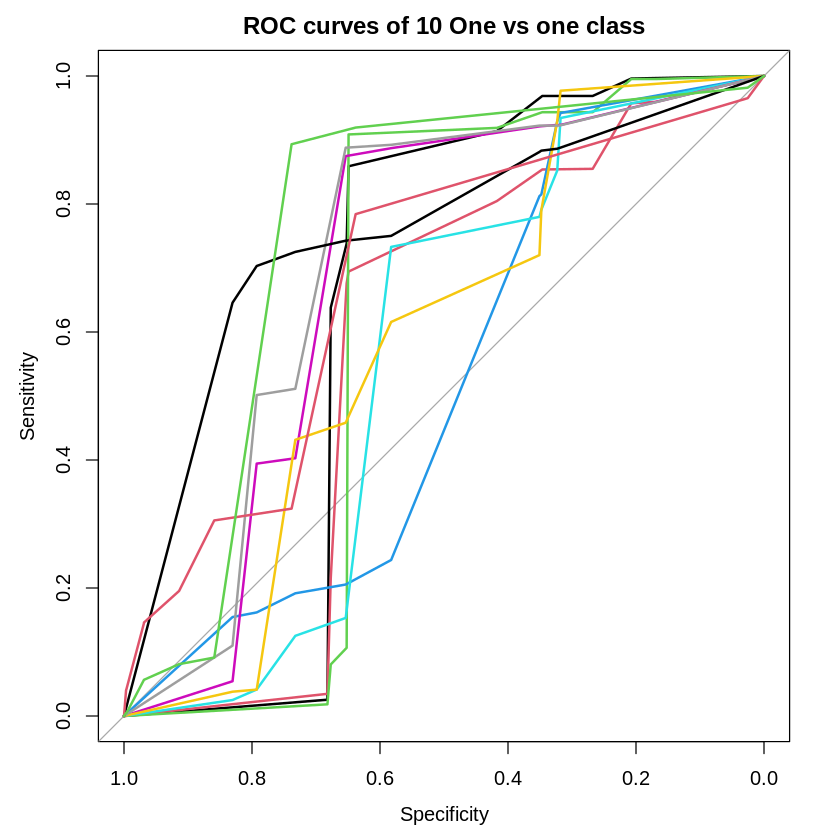

In [ ]:
# finding ROC
lr_train_ROC=lr_train_AUC$rocs
plot.roc(lr_train_ROC[[1]],col=1,main="ROC curves of 10 One vs one class")
for(i in 2:11)
{num=paste("1/",as.character(i),sep="")
lines.roc(lr_train_ROC[[i]],col=i)
}



In [ ]:
#bias and variance
print(var(as.numeric(lr_train_), as.numeric(as.factor(train_set$music_genre))))
bias(as.numeric(pred1), as.numeric(as.factor(train_set$music_genre)))

[1] 4.004507


[1] 0.09275

In [ ]:
lr_pred_test=predict(lr_model,test_set,type="class")
lr_test_table=confusionMatrix(table(test_set$music_genre, lr_pred_test))
lr_test_table

Confusion Matrix and Statistics

             lr_pred_test
              Alternative Anime Blues Classical Country Electronic Hip-Hop Jazz
  Alternative         314     8    18         3     208         66      90   66
  Anime                25   608    88       129      51         63       0   24
  Blues                47   172   434        23     107         61       1  105
  Classical            25    70    27       787       8         17       0   65
  Country              62    24    99         1     565         35      22   37
  Electronic           72    85    49        17      47        559      21   96
  Hip-Hop              84     0     1         0      28         18     495   18
  Jazz                 27    64   128        67     100        141      32  395
  Rap                  60     0     1         0      25          9     356    6
  Rock                125     4     3         1     123          7      12   22
             lr_pred_test
              Rap Rock
  Alternativ

In [ ]:
# Logistic Regression Performance Parameters
require(pROC)
# Testing Data
lr_test_pm=lr_test_table$byClass[, c("Balanced Accuracy", "Precision", "Sensitivity", "Specificity", "Recall")]
print("Logistic-Regression Testing data Performance Parameters:")
lr_test_pm
lr_test_macavg=round(apply(lr_test_pm,2,mean),4)
print("Macro Averages:")
lr_test_macavg

[1] "Logistic-Regression Training data Performance Parameters:"


,Balanced Accuracy,Precision,Sensitivity,Specificity,Recall
Class: Alternative,0.6507070,0.3227133,0.3733650,0.9280489,0.3733650
Class: Anime,0.7721916,0.6116700,0.5874396,0.9569437,0.5874396
Class: Blues,0.7256296,0.4392713,0.5117925,0.9394668,0.5117925
Class: Classical,0.8707447,0.7846461,0.7655642,0.9759251,0.7655642
Class: Country,0.6998753,0.5741870,0.4477021,0.9520485,0.4477021
Class: Electronic,0.7623260,0.5629406,0.5727459,0.9519060,0.5727459
Class: Hip-Hop,0.7089230,0.4661017,0.4810496,0.9367963,0.4810496
Class: Jazz,0.7039173,0.3957916,0.4736211,0.9342134,0.4736211
Class: Rap,0.6998949,0.4170000,0.4638487,0.9359411,0.4638487
Class: Rock,0.7428822,0.6527363,0.5256410,0.9601234,0.5256410


[1] "Macro Averages:"


Balanced Accuracy         Precision       Sensitivity       Specificity 
           0.7337            0.5227            0.5203            0.9471 
           Recall 
           0.5203

In [ ]:
# finding AUC
lr_test_=predict(lr_model, test_set)
lr_test_AUC=multiclass.roc(test_set$music_genre,as.numeric(lr_test_))
print(paste("Logistic-Regression Testing AUC:",round(lr_test_AUC$auc,4)))


Setting direction: controls > cases

Setting direction: controls > cases

Setting direction: controls > cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

S

[1] "Logistic-Regression Testing AUC: 0.7338"


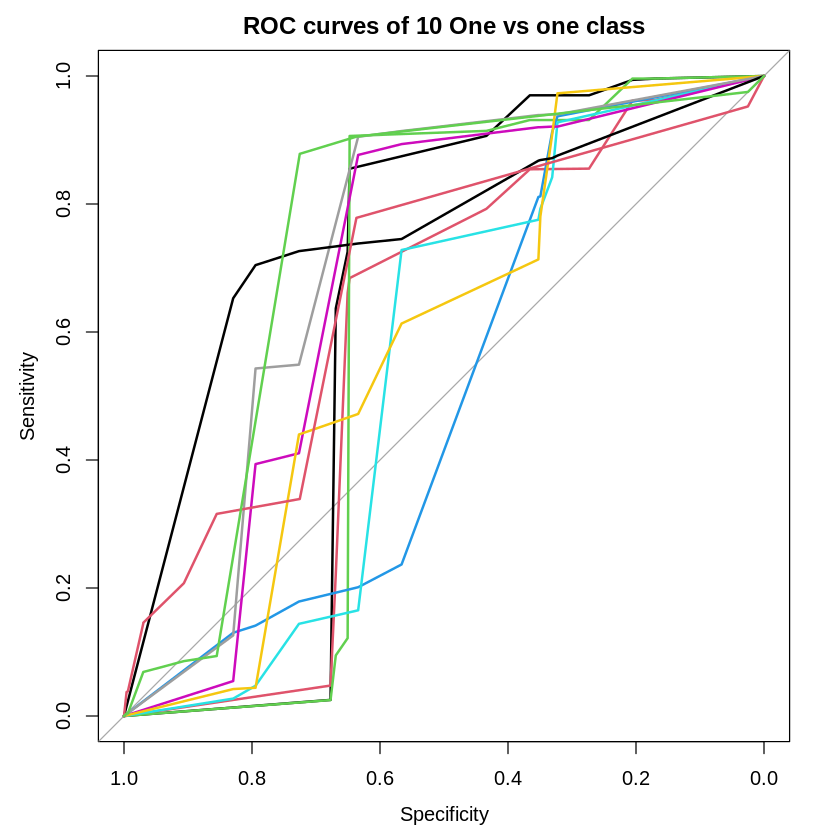

In [ ]:
# finding ROC
require(pROC)
lr_test_ROC=lr_test_AUC$rocs
plot.roc(lr_test_ROC[[1]],col=1,main="ROC curves of 10 One vs one class")
for(i in 2:11)
{num=paste("1/",as.character(i),sep="")
lines.roc(lr_test_ROC[[i]],col=i)
}

In [ ]:
#Bias and variance
print(var(as.numeric(lr_test_), as.numeric(as.factor(test_set$music_genre))))
bias(as.numeric(lr_test_), as.numeric(as.factor(test_set$music_genre)))

[1] 4.036767


[1] 0.0896

In [ ]:
lr_train_accuracy=round(lr_train_table$overall[['Accuracy']],4)
lr_test_accuracy=round(lr_test_table$overall[['Accuracy']],4) 
lr_model_isOF=abs((lr_train_accuracy-lr_test_accuracy)/lr_train_accuracy)
lr_model_isOF=round(lr_model_isOF,4)
print(paste("Accuracy drop from training data to test data is",lr_model_isOF*100,"%"))
if(lr_model_isOF>0.25) print("Model is over-fitting") else print("Model is not over-fitting")

[1] "Accuracy drop from training data to test data is 0.19 %"
[1] "Model is not over-fitting"


**NAIVE BAYES**

In [ ]:
require(e1071)
formstr="music_genre~."
formstr_nb=formula(formstr)
nb_model=naiveBayes(formstr_nb,data=train_set) # train model

Loading required package: e1071


Attaching package: ‘e1071’


The following object is masked from ‘package:mltools’:

    skewness




In [ ]:
nb_pred_train=predict(nb_model,train_set,type="class")
nb_train_table=confusionMatrix(table(train_set$music_genre,nb_pred_train))
print(nb_train_table)

Confusion Matrix and Statistics

             nb_pred_train
              Alternative Anime Blues Classical Country Electronic Hip-Hop Jazz
  Alternative         862    10    65        44    1633        189     379  202
  Anime               134  1195   138       792    1197        447       1   94
  Blues               186   260   768       143    1750        373      32  414
  Classical            78    70    30      3474     119         90       1  133
  Country             206    26   111        57    3125         60     121  107
  Electronic          284   179   165        64     614       1929     185  426
  Hip-Hop              73     0     4         2     508         34    1365   50
  Jazz                130    92   262       655     690        631     225 1244
  Rap                  99     1     9         3     601         14    1008   57
  Rock                247     1    25        94    1948         95      73  130
             nb_pred_train
               Rap Rock
  Alterna

In [ ]:
# Naive Bayes Performance Parameters
require(pROC)
# Training Data
nb_train_pm=nb_train_table$byClass[, c("Balanced Accuracy", "Precision", "Sensitivity", "Specificity", "Recall")]
print("Naive Bayes Training data Performance Parameters:")
nb_train_pm
nb_train_macavg=round(apply(lr_train_pm,2,mean),4)
print("Macro Averages:")
nb_train_macavg

[1] "Naive Bayes Training data Performance Parameters:"


,Balanced Accuracy,Precision,Sensitivity,Specificity,Recall
Class: Alternative,0.6454978,0.2140551,0.3749456,0.9160500,0.3749456
Class: Anime,0.7889647,0.2983025,0.6515812,0.9263481,0.6515812
Class: Blues,0.7012860,0.1914257,0.4870006,0.9155714,0.4870006
Class: Classical,0.8184714,0.8691519,0.6520270,0.9849158,0.6520270
Class: Country,0.6122149,0.7781375,0.2564629,0.9679669,0.2564629
Class: Electronic,0.7209902,0.4814075,0.4994821,0.9424982,0.4994821
Class: Hip-Hop,0.6661868,0.3466227,0.4026549,0.9297187,0.4026549
Class: Jazz,0.6805841,0.3108446,0.4354218,0.9257464,0.4354218
Class: Rap,0.6756156,0.5092500,0.4073185,0.9439127,0.4073185
Class: Rock,0.7230034,0.2200250,0.5272945,0.9187123,0.5272945


[1] "Macro Averages:"


Balanced Accuracy         Precision       Sensitivity       Specificity 
           0.7347            0.5241            0.5222            0.9473 
           Recall 
           0.5222

In [ ]:
# finding AUC
nb_train_=predict(nb_model, train_set)
nb_train_AUC=multiclass.roc(train_set$music_genre,as.numeric(nb_train_))
print(paste("Naive Bayes Training AUC:",round(nb_train_AUC$auc,4)))
nb_train_ROC=nb_train_AUC$rocs

Setting direction: controls > cases

Setting direction: controls < cases

Setting direction: controls > cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls > cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

S

[1] "Naive Bayes Training AUC: 0.7038"


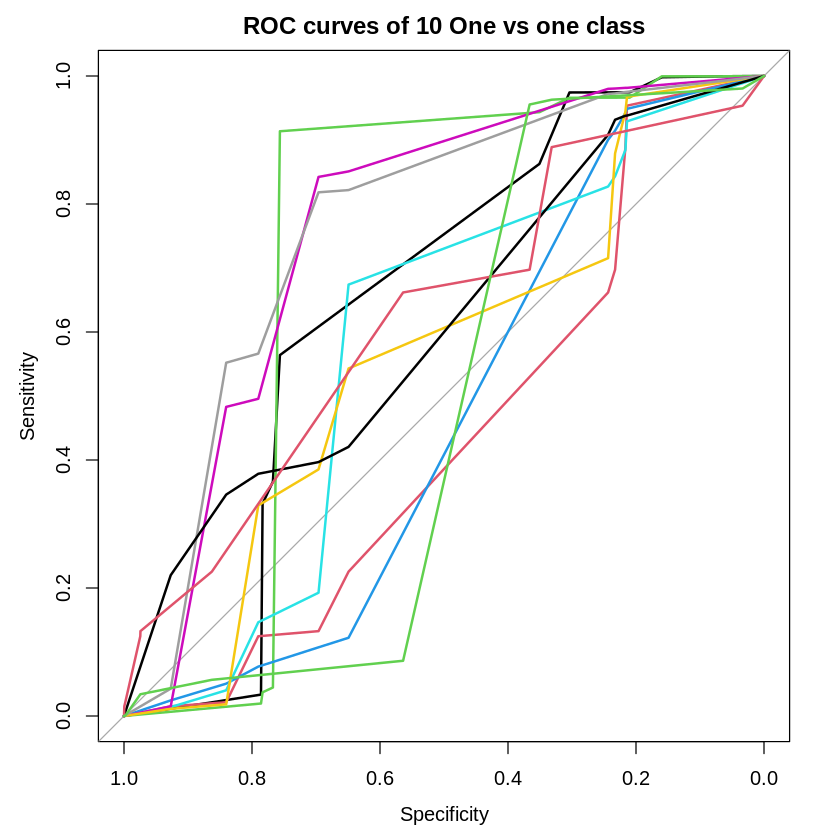

In [ ]:
# finding ROC
require(pROC)
nb_train_ROC=nb_train_AUC$rocs
plot.roc(nb_train_ROC[[1]],col=1,main="ROC curves of 10 One vs one class")
for(i in 2:11)
{num=paste("1/",as.character(i),sep="")
lines.roc(nb_train_ROC[[i]],col=i)
}

In [ ]:
nb_pred_test=predict(nb_model,test_set,type="class")
nb_test_table=confusionMatrix(table(test_set$music_genre,nb_pred_test))
print(nb_test_table)

Confusion Matrix and Statistics

             nb_pred_test
              Alternative Anime Blues Classical Country Electronic Hip-Hop Jazz
  Alternative         195     3     9        11     398         49      93   60
  Anime                23   319    36       193     277        118       2   21
  Blues                56    66   199        46     392         91      11  115
  Classical            14    15    14       872      31         15       0   39
  Country              44    14    24        14     747         15      44   33
  Electronic           76    44    26        22     144        474      58  100
  Hip-Hop              24     0     5         0     127          8     359   23
  Jazz                 34    31    55       168     158        156      68  307
  Rap                  22     1     2         0     138          8     255   18
  Rock                 77     2     7        13     480         20      13   33
             nb_pred_test
              Rap Rock
  Alternativ

In [ ]:
# Naive Bayes Performance Parameters
require(pROC)
# Training Data
nb_test_pm=nb_test_table$byClass[, c("Balanced Accuracy", "Precision", "Sensitivity", "Specificity", "Recall")]
print("Naive Bayes Testing data Performance Parameters:")
nb_test_pm
nb_test_macavg=round(apply(lr_test_pm,2,mean),4)
print("Macro Averages:")
nb_test_macavg

[1] "Naive Bayes Testing data Performance Parameters:"


,Balanced Accuracy,Precision,Sensitivity,Specificity,Recall
Class: Alternative,0.6313369,0.2004111,0.3451327,0.9175411,0.3451327
Class: Anime,0.7867146,0.3209256,0.6444444,0.9289847,0.6444444
Class: Blues,0.7229302,0.2014170,0.5278515,0.9180089,0.5278515
Class: Classical,0.8180535,0.8693918,0.6512323,0.9848747,0.6512323
Class: Country,0.6124780,0.7591463,0.2582988,0.9666573,0.2582988
Class: Electronic,0.7197410,0.4773414,0.4968553,0.9426266,0.4968553
Class: Hip-Hop,0.6601427,0.3380414,0.3975637,0.9227218,0.3975637
Class: Jazz,0.6675926,0.3076152,0.4098798,0.9253054,0.4098798
Class: Rap,0.6663114,0.5100000,0.3890160,0.9436069,0.3890160
Class: Rock,0.7303958,0.2238806,0.5421687,0.9186228,0.5421687


[1] "Macro Averages:"


Balanced Accuracy         Precision       Sensitivity       Specificity 
           0.7337            0.5227            0.5203            0.9471 
           Recall 
           0.5203

In [ ]:
# finding AUC
nb_test_=predict(nb_model, test_set)
nb_test_AUC=multiclass.roc(test_set$music_genre,as.numeric(nb_test_))
print(paste("Naive Bayes Testing AUC:",round(nb_test_AUC$auc,4)))
nb_test_ROC=nb_test_AUC$rocs

Setting direction: controls > cases

Setting direction: controls < cases

Setting direction: controls > cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls > cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

S

[1] "Naive Bayes Testing AUC: 0.7028"


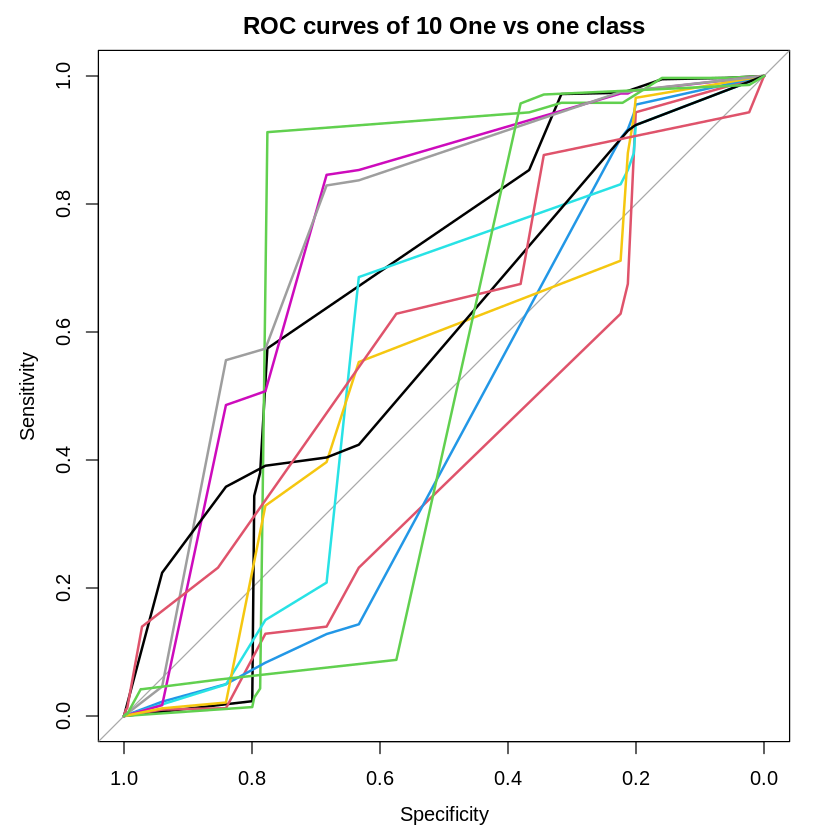

In [ ]:
# finding ROC
require(pROC)
nb_test_ROC=nb_test_AUC$rocs
plot.roc(nb_test_ROC[[1]],col=1,main="ROC curves of 10 One vs one class")
for(i in 2:11)
{num=paste("1/",as.character(i),sep="")
lines.roc(nb_test_ROC[[i]],col=i)
}

In [ ]:
#Bias and variance
print(var(as.numeric(nb_train_), as.numeric(as.factor(train_set$music_genre))))
bias(as.numeric(nb_train_), as.numeric(as.factor(train_set$music_genre)))

[1] 2.723254


[1] 0.116375

In [ ]:
#Bias and variance
print(var(as.numeric(nb_test_), as.numeric(as.factor(test_set$music_genre))))
bias(as.numeric(nb_test_), as.numeric(as.factor(test_set$music_genre)))

[1] 2.722211


[1] 0.1205